In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapefile
import time


class Reader:
    def __init__(self):
        self.shapefile = None
        self.indexes = None
        self.df_features = None
        self.projections = None

    def read_shapefile(self, shapefile="./vector_input/mtbs_fod_pts_data/mtbs_FODpoints_DD.shp",
                       indexes="./vector_input/mtbs_fod_pts_data/mtbs_FODpoints_DD.shx",
                       db_features="./vector_input/mtbs_fod_pts_data/mtbs_FODpoints_DD.dbf"):
        """
        All 3 inputs below result in the same dataframe. when geopandas reads a single file,
        it will also read the relevant adjacent files with same file name and different extensions.
        """
        self.shapefile = gpd.read_file(shapefile)
        if(indexes != None):
            self.indexes = gpd.read_file(indexes)
        if(db_features != None):
            self.db_features = pd.DataFrame(gpd.read_file(db_features))

    def output_shapefile(self, print_head=False, print_columns=False, print_extra_variables=False, close_window_after_sleep=True, plot_file=True):
        if(print_head):
            print(self.shapefile.head())
        if(print_columns):
            print(self.shapefile.columns)
        """
        ['Event_ID', 'irwinID', 'Incid_Name', 'Incid_Type', 'Map_ID', 'Map_Prog',
       'Asmnt_Type', 'BurnBndAc', 'BurnBndLat', 'BurnBndLon', 'Ig_Date',
       'Pre_ID', 'Post_ID', 'Perim_ID', 'dNBR_offst', 'dNBR_stdDv', 'NoData_T',
       'IncGreen_T', 'Low_T', 'Mod_T', 'High_T', 'Comment', 'ORIG_FID',
       'geometry']
        """
        if(print_extra_variables):
            print(self.indexes.head())
            print(self.indexes.columns)
            print(self.db_features.head())
            print(self.db_features.columns)
        """
        ['Event_ID', 'irwinID', 'Incid_Name', 'Incid_Type', 'Map_ID', 'Map_Prog',
       'Asmnt_Type', 'BurnBndAc', 'BurnBndLat', 'BurnBndLon', 'Ig_Date',
       'Pre_ID', 'Post_ID', 'Perim_ID', 'dNBR_offst', 'dNBR_stdDv', 'NoData_T',
       'IncGreen_T', 'Low_T', 'Mod_T', 'High_T', 'Comment', 'ORIG_FID',
       'geometry']
        """
        #print(self.projections)
        self.shapefile.plot()
        if(plot_file):
            plt.show()
            if (close_window_after_sleep):
                time.sleep(5)
                plt.close()

    def inspect_polygons(self):
        for row in self.shapefile['geometry']:
            print(row)
            """
            has list of polygons and multipolygons
            """

    def plot_polygon(self, polygons_to_plot=1):
        for index, row in self.shapefile.iterrows():
            #for col in self.shapefile.columns:
            #print(col + ": " + str(self.shapefile.iloc[index][col]) + "\n")
            print("about to plot")
            poly = gpd.GeoSeries(row.geometry)
            print(poly)
            poly.plot()
            print("plotted")
            plt.show()
            time.sleep(5)
            plt.close()
        # for index, row in self.shapefile.iterrows():
        #     if(index >= polygons_to_plot):
        #         break
        #     geom = row['geometry']
        #     geom.plot()
        #     plt.show()
        #     time.sleep(5)
        #     plt.close()

    def retrieve_state(self, state):
        poly = self.shapefile.loc[self.shapefile['NAME'].str.lower(
        ) == state.lower(), "geometry"]
        return poly

    def plot_state(self, polygon):
        polygon.plot()
        plt.show()
        

In [3]:
#MTBS URLs: Fire Occurence Data Set
# https://edcintl.cr.usgs.gov/downloads/sciweb1/shared/MTBS_Fire/data/composite_data/fod_pt_shapefile/mtbs_fod_pts_data.zip
# Burned Area Boundaries Dataset
# https://edcintl.cr.usgs.gov/downloads/sciweb1/shared/MTBS_Fire/data/composite_data/burned_area_extent_shapefile/mtbs_perimeter_data.zip

#burn severity mosaic download 
#<form id="bulkform"  method="post" action="https://edcintl.cr.usgs.gov/mtbs_remote_zip_servlet/ZipServlet">
#<input id="file_paths" name="file_paths" value> note: not value="">, just value>
#</form>

In [4]:
#download file into zip , 
#open zip file and extract contents. 
#load shapefile into script. 
#load shapefile into xarray.

In [5]:

from zipfile import ZipFile

URL_example_1 = "https://edcintl.cr.usgs.gov/mtbs_remote_zip_servlet/ZipServlet"

area_example_1 = "CONUS" #Continental United States
area_example_2 = "MT" #Montana
year = 2014

prefix = "mtbs_"
suffix = ".zip"

file_name = prefix + area_example_2 + "_" + str(year) + suffix
full_path = URL_example_1 + "/" + file_name
print(URL_example_1)
print(file_name)
print(full_path)

https://edcintl.cr.usgs.gov/mtbs_remote_zip_servlet/ZipServlet
mtbs_MT_2014.zip
https://edcintl.cr.usgs.gov/mtbs_remote_zip_servlet/ZipServlet/mtbs_MT_2014.zip


In [6]:
#wget.download(full_path)

In [7]:
import requests
#pathload file_path: "mtbs%2F20182Fid4784911596620180731.zip"
file_path = "composite_data/MTBS_BSmosaics/" + str(year) + "/" + file_name
file_path
data = {"file_paths" : file_path} 
headers = {
    "Accept" : "test/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Accept-Language" : "en-US,en;q=0.9",
    "Accept-Encoding" : "gzip, deflate, br",
    "Cache-Control" : "max-age=0",
    "Connection" : "keep-alive",
    "Content-Length" : "68",
    "Content-Type" : "application/x-www-form-urlencoded",
    "Host" : "edcintl.cr.usgs.gov",
    "Origin" : "https://www.mtbs.gov",
    "Referer" : "https://www.mtbs.gov/",
    "sec-ch-ua" : '" Not A;Brand";v="99", "Chromium";v="100","Google Chrome";v=100',
    "sec-ch-ua-mobile" : "?0",
    "sec-ch-ua-platform" : "Windows",
    "Sec-Fetch-Dest" : "document",
    "Sec-Fetch-Mode" : "navigate",
    "Sec-Fetch-Site" : "cross-site",
    "Sec-Fetch-User" : "?1",
    "Upgrade-Insecure-Requests" : "1",
    "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36"
}

file = requests.post(URL_example_1, data = data, headers = headers)
file.content
#with ZipFile(file_name, "w") as zipfile_mtbs:
#    zipfile_mtbs.extractall()
#    zipfile_mtbs.write(file.content)
saved_path = "composite_data/MTBS_BSmosaics/" + str(year) + "/"


In [8]:
path = saved_path+file_name
path

'composite_data/MTBS_BSmosaics/2014/mtbs_MT_2014.zip'

In [9]:
from io import BytesIO
zipfile_mtbs = ZipFile(BytesIO(file.content))
zipfile_mtbs.extractall()


In [10]:
with ZipFile(path, 'r') as zip_file_to_ext:
    zip_file_to_ext.extractall(saved_path)
    

In [11]:
import rioxarray as rio
import xarray as xr
tiff_path = path[:-3] + "tif"
tiff_path
geotiff_da = rio.open_rasterio(tiff_path)
geotiff_da

<xarray.DataArray (band: 1, y: 14508, x: 21648)>
[314069184 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -1.447e+06 -1.447e+06 ... -7.976e+05 -7.976e+05
  * y            (y) float64 2.956e+06 2.956e+06 ... 2.521e+06 2.521e+06
    spatial_ref  int32 0
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

In [12]:
geotiff_ds = geotiff_da.to_dataset('band')
geotiff_ds = geotiff_ds.rename({1:"Boundary"})
geotiff_ds

<xarray.Dataset>
Dimensions:      (y: 14508, x: 21648)
Coordinates:
  * x            (x) float64 -1.447e+06 -1.447e+06 ... -7.976e+05 -7.976e+05
  * y            (y) float64 2.956e+06 2.956e+06 ... 2.521e+06 2.521e+06
    spatial_ref  int32 0
Data variables:
    Boundary     (y, x) uint8 ...
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

In [13]:
import matplotlib.pyplot as plt


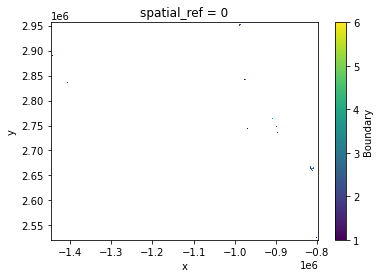

In [14]:
geotiff_ds = geotiff_ds.where(geotiff_ds != geotiff_ds.attrs['_FillValue'])
geotiff_ds.Boundary.plot()
#end of burn severity data section

In [15]:
geotiff_ds_masked = geotiff_ds.where(geotiff_ds != geotiff_ds.attrs['_FillValue'])

In [16]:
#testing fire bundles data pulls
#need fire id for url path parameter, can get from list